# 4 weeks training tonnage models
In this file we are creating models that are based on the dataset that only contain
individual parameters and the preperformance and the postperformance.

In [11]:
from helpers import print_mean_squared_error, print_coefficient_of_determination, calculate_age
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from io import StringIO
import csv

import sys
sys.path.append('./MLmodels')
from DataReader import DataSampleValues
from ModelsRunner import ModelsRunner

import sys
sys.path.append('../recengine/data_parser.py')
from data_parser import ttrdata_from_csv_population_4_weeks

In [19]:
# Loads raw data and transforms.
logs = pd.read_csv("./data/ogasawara_HL/logs.csv", sep="|")

# Calculate TTR_DATA based on pre-logs.
ttr_data = ttrdata_from_csv_population_4_weeks("./data/ogasawara_HL/pre_logs.csv")

post_logs = {}
for p_id, group in logs.groupby('ID'):
    post_logs[str(p_id)] = group


headers = ["load_week1", "max_week1", "load_week2", "max_week2", "load_week3", "max_week3", "load_week4", "max_week4", "Performance"]

data = pd.DataFrame(columns=headers)


for index, row in ttr_data.iterrows():
    p_id = row["id"]
    ttr = row.drop("id").values.tolist()
    
    postperformance = post_logs.get(p_id)["Performance"].values[-1]
    ttr.append(postperformance)
    
    data = data.append(pd.Series(ttr, index=data.columns), ignore_index=True)
    

data.head()


,load_week1,max_week1,load_week2,max_week2,load_week3,max_week3,load_week4,max_week4,Performance
0,6480.0,96.0,6480.0,96.0,6480.0,96.0,6480.0,96.0,133.920162
1,7290.0,108.0,7290.0,108.0,7290.0,108.0,7290.0,108.0,146.629836
2,6817.5,101.0,6817.5,101.0,6817.5,101.0,6817.5,101.0,139.230566
3,7155.0,106.0,7155.0,106.0,7155.0,106.0,7155.0,106.0,144.519665
4,6345.0,94.0,6345.0,94.0,6345.0,94.0,6345.0,94.0,131.789482


In [20]:
# Split into training set and testing set.

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('Performance', axis=1)

Y = data_shuffled['Performance']

data_holder = DataSampleValues(x=X, y=Y)

____________________________________________________

The Training results of Lasso model are : 
Mean squared error: 0.00
Coefficient of determination: 1.00
____________________________________________________



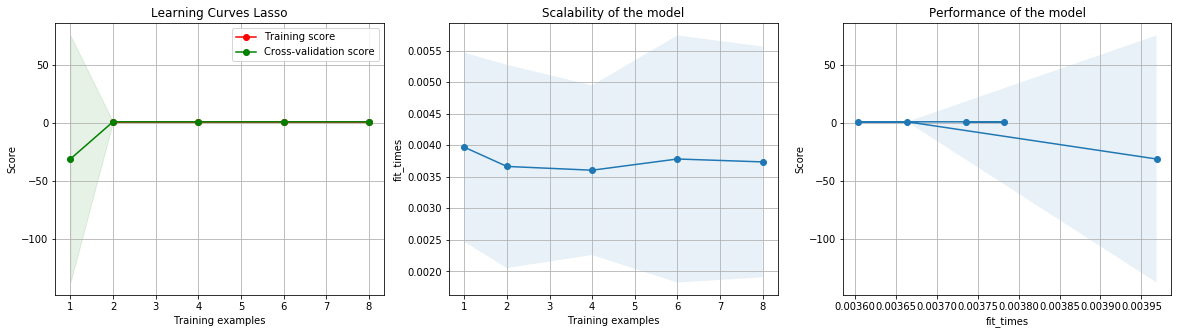

____________________________________________________

The Training results of Ridge model are : 
Mean squared error: 0.00
Coefficient of determination: 1.00
____________________________________________________



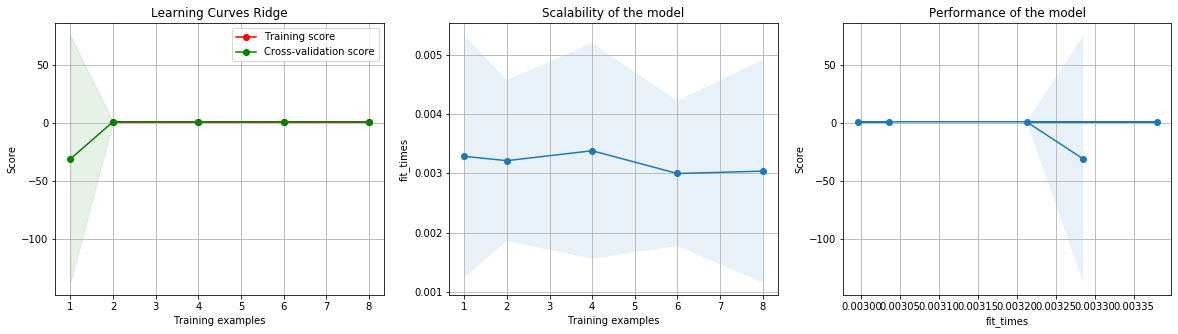

____________________________________________________

The Training results of Elastic Net model are : 
Mean squared error: 0.00
Coefficient of determination: 1.00
____________________________________________________



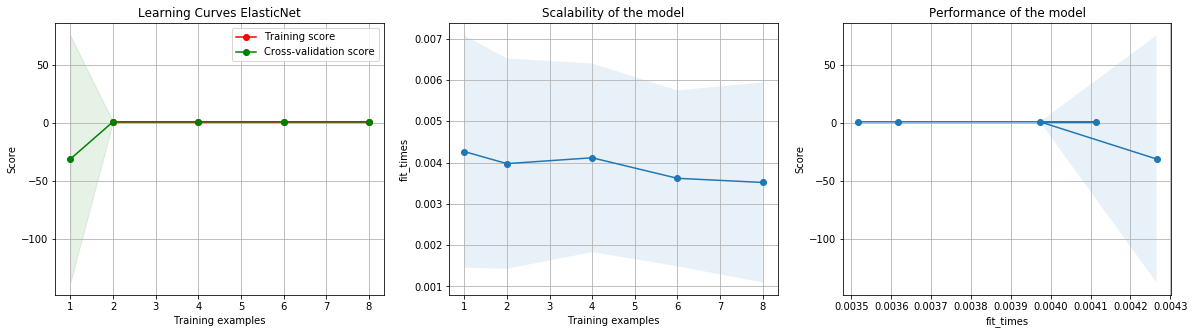

____________________________________________________

The Training results of Decision Tree model are : 
Mean squared error: 2.82
Coefficient of determination: 0.73
____________________________________________________



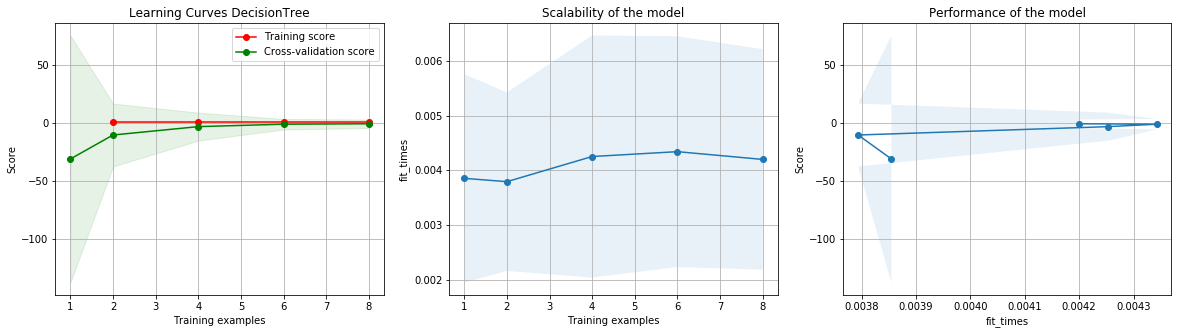

____________________________________________________

The Training results of Random Forest model are : 
Mean squared error: 0.58
Coefficient of determination: 0.94
____________________________________________________



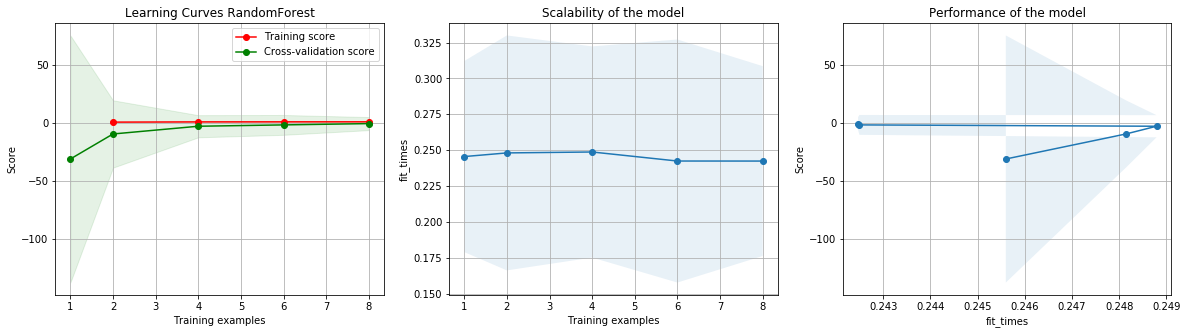

AttributeError: 'MLPRegressor' object has no attribute '_best_coefs'

In [17]:
models_runner = ModelsRunner(data_sample=data_holder)
models_runner.train_all_models_and_plot_curves()

In [21]:
import pickle

# In the current state of recommendation engine, it is important to name the model after
# the program the data comes from. (i.e the name of the csv file in simulator/training_programs)
# Should probably make this automatic in some way.

# This exports all models, then you can choose to save the one that performs the best, rename it and then move to recommendation engine.
#models_runner.train_all_models_on_specific_data_and_then_save_them_all_as_binary_sav_files(data_holder.X, data_holder.Y)